# **Scipy** 

[docs.scipy.org](https://docs.scipy.org/doc/scipy/reference/)

**Included in scipy:**


*   Integrate
*   Interpolate
*   Optimization
*   FFT
*   Signal Processing
*   Linear algebra
*   Spatial data structures
*   Statistics
*   Multidimensional image processing 
*   File I/O
*   Constants library ([here](https://docs.scipy.org/doc/scipy/reference/constants.html))

**We will look at a few examples:**
*  Integration
https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
*  Interpolation
*  FFT



# **Integration**

In [ ]:
import scipy.integrate
?? scipy.integrate
# help(scipy.integrate)

In [ ]:
from scipy.integrate import quad

def f(x):
  return 3.0*x**2-2*x-5

intg, err = quad(f,0,10)
print(intg)
print(err)


850.0
9.579358197802414e-12


In [ ]:
import numpy as np

def g(x):
  return np.exp(-x)*np.sin(3.0*x)

intg = quad(g, 0, 2*np.pi)
print(intg[0])
print(intg[1])


0.29943976718048754
5.05015300411582e-13


trapz integration of  1025  points is  -1.3333282607042847
cumtrapz integration of  1025  points is  -1.3333282607042845
simps integration of  1025  points is  -1.3333295285520135
romb integration of  1025  points is  [ 0.00000000e+00 -1.33332953e+00 -2.66665906e+00 ... -1.36266278e+03
 -1.36399611e+03 -1.36532944e+03]
numerical integration using quad of  1025  points is  (-1.3333333333333333, 1.4802973661668752e-14)


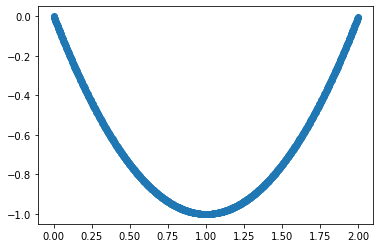

In [ ]:
# Integrating tabular or "sampled" data

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps, trapz, cumtrapz, romb
%matplotlib inline

def f(x):
  return -2*x+x**2

n=10
lim1=0
lim2=2
incr=(lim2-lim1)/(2**n+1)

x=np.arange(lim1,lim2, incr)
y=f(x)

plt.plot(x,y, 'o')

I1=trapz(y,x)
print('trapz integration of ', 2**n+1, ' points is ', I1)

I2=cumtrapz(y,x)
print('cumtrapz integration of ', 2**n+1, ' points is ', I2[-1])

I3=simps(y,x)
print('simps integration of ', 2**n+1, ' points is ', I3)

I4=romb(y,x)
print('romb integration of ', 2**n+1, ' points is ', I4)

I5=quad(f,lim1,lim2)
print('numerical integration using quad of ', 2**n+1, ' points is ', I5)


# **Interpolation**

In [ ]:
from scipy import interpolate
?? interpolate.splev

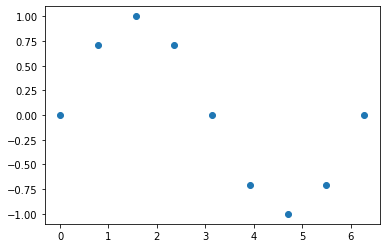

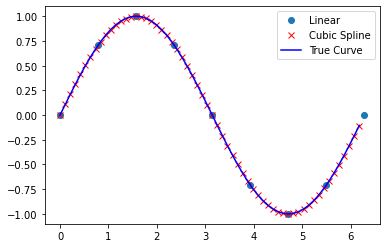

In [ ]:
from scipy import interpolate

x=np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y=np.sin(x)
plt.plot(x,y, 'o')

tck = interpolate.splrep(x,y,s=0)

xnew = np.arange(0, 2*np.pi, np.pi/30)
ynew = interpolate.splev(xnew, tck, der=0)

plt.figure()
plt.plot(x,y,'o', xnew,ynew, 'rx', xnew, np.sin(xnew), 'b')
plt.legend(['Linear', 'Cubic Spline', 'True Curve'])
plt.show()





In [ ]:
# In class exercise 1
# Numerically integrate using quad the expression exp(-2x)*sin(x) from 0 to 2*pi. 


# In class exercise 2
# Using the above funtion, create a dataset with 10 points from 0 to 2*pi and itegrate using "trapz"
# Calculate the difference from part 1 and the integration with 10 points.  Is there a problem?

# In class exercise 3
# Plot the function (solid line) and the 10 sparse data points (as red circles 'ro')


(0.1999993025315287, 2.051139720762487e-11)
0.16285528257380788
difference is  0.03714401995772082


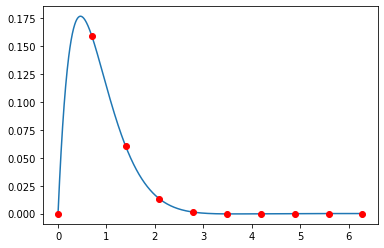

In [ ]:
# part 1

def t(x):
  return np.exp(-2*x)*np.sin(x)

I1=quad(t, 0, 2*np.pi)
print(I1)

# Part 2

xvals=np.linspace(0,2*np.pi,10)
yvals=t(xvals)

IT=trapz(yvals,xvals)
print(IT)

print('difference is ',I1[0]-IT)

# Part 3

xvalstrue=np.linspace(0,2*np.pi, 1000)
yvalstrue=t(xvalstrue)

plt.plot(xvalstrue,yvalstrue, xvals, yvals, 'ro')


# **FFT**

In [ ]:
import numpy as np

def singlesine(n):
  fo=0.2

  xvals=np.linspace(0.0, 50, n, endpoint=False)
  f=np.sin(2.0*fo*np.pi*xvals)

  return(xvals,f)


In [ ]:
import matplotlib.pyplot as plt

def FFTPLOT(xvals,f):
  n=len(xvals)
  F_k=np.fft.rfft(f)
  F_k_r = F_k.real
  F_k_i = F_k.imag

  k = np.fft.rfftfreq(n)
  freq = k*n/(max(xvals) + xvals[1])  # computes frequency range

  fkinv = np.fft.irfft(F_k)

  plt.subplot(311)
  plt.plot(xvals,f)
  plt.xlabel("x")
  plt.ylabel("f(x)")

  plt.subplot(312)
  plt.plot(freq, F_k_r, label=r"Re($\mathcal{F}$)")
  plt.plot(freq, F_k_i,'o', ls=":", label=r"Im($\mathcal{F}$)")
  plt.xlabel(r"$\nu_k$")
  plt.ylabel("F(k)")
  
  f = plt.gcf()
    
  f.set_size_inches(10,8)
  plt.tight_layout()

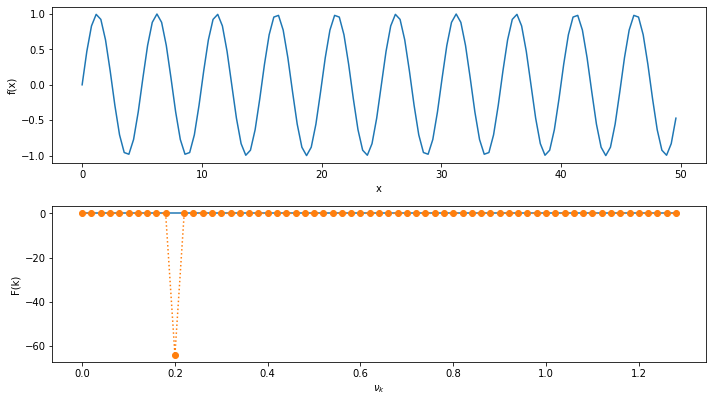

In [ ]:
npts = 128
xx, f = singlesine(npts)
FFTPLOT(xx, f)


# **Sympy**

In [2]:
import sympy as sp
from sympy import exp, cos, sin, log, pi

x=sp.Symbol('x')
sp.integrate(3.0*x**2-2*x-5,x)


1.0*x**3 - 1.0*x**2 - 5.0*x

In [11]:
import numpy as np

print(sp.integrate(exp(3*x)))

print(sp.integrate(cos(2*pi*x)))

?? sp.integrate

exp(3*x)/3
sin(2*pi*x)/(2*pi)


#**Assignment 3**



1.   Numerically integrate the following:  $$\int_0^{4\pi} e^{x}*sin(3x)$$


2.   Symbollically integrate the following:   $$\int_0^{4\pi} e^{x}*sin(3x)$$


3.   Create sampled data of 15 points from x=0 to x=10 using the function:
$${3x^2}+5{x}+10$$
Then create and fit a cubic spline to these data points.  Plot original 15 points, the cubic spline, and the "perfect" curve.  The perfect curve is a just a real representation of the function (i.e., just us a lot of data points).  

